In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df=pd.read_csv("data.csv", encoding='cp1252')

/var/folders/dh/8yr95nx513bf7h0cpwgm30jw0000gn/T/ipykernel_69251/1948956766.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data.csv", encoding='cp1252')


In [25]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [27]:
df.isnull()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,False,False,False,False,True,False,False,False,True,True,True,True,False
1,False,False,False,False,True,False,False,False,True,True,True,True,False
2,False,False,False,False,True,False,False,False,True,True,True,True,False
3,False,False,False,False,True,False,False,False,True,True,True,True,False
4,False,False,False,False,True,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,False,False,False,False,False,False,False,False,False,True,False,True,False
435738,False,False,False,False,False,False,False,False,False,True,False,True,False
435739,True,True,False,True,True,True,True,True,True,True,True,True,True
435740,True,True,False,True,True,True,True,True,True,True,True,True,True


In [28]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [29]:
df=df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1)

In [30]:
df=df.dropna(subset=['date'])

In [31]:
COLS=['so2', 'no2', 'rspm', 'spm', 'pm2_5']
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS]=imputer.fit_transform(df[COLS])

In [32]:
df.isnull()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435734,False,False,False,False,False,False,False,False,False
435735,False,False,False,False,False,False,False,False,False
435736,False,False,False,False,False,False,False,False,False
435737,False,False,False,False,False,False,False,False,False


In [33]:
df.isnull().sum()

state          0
location       0
type        5390
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           0
dtype: int64

Text(0.5, 1.0, 'boxplot')

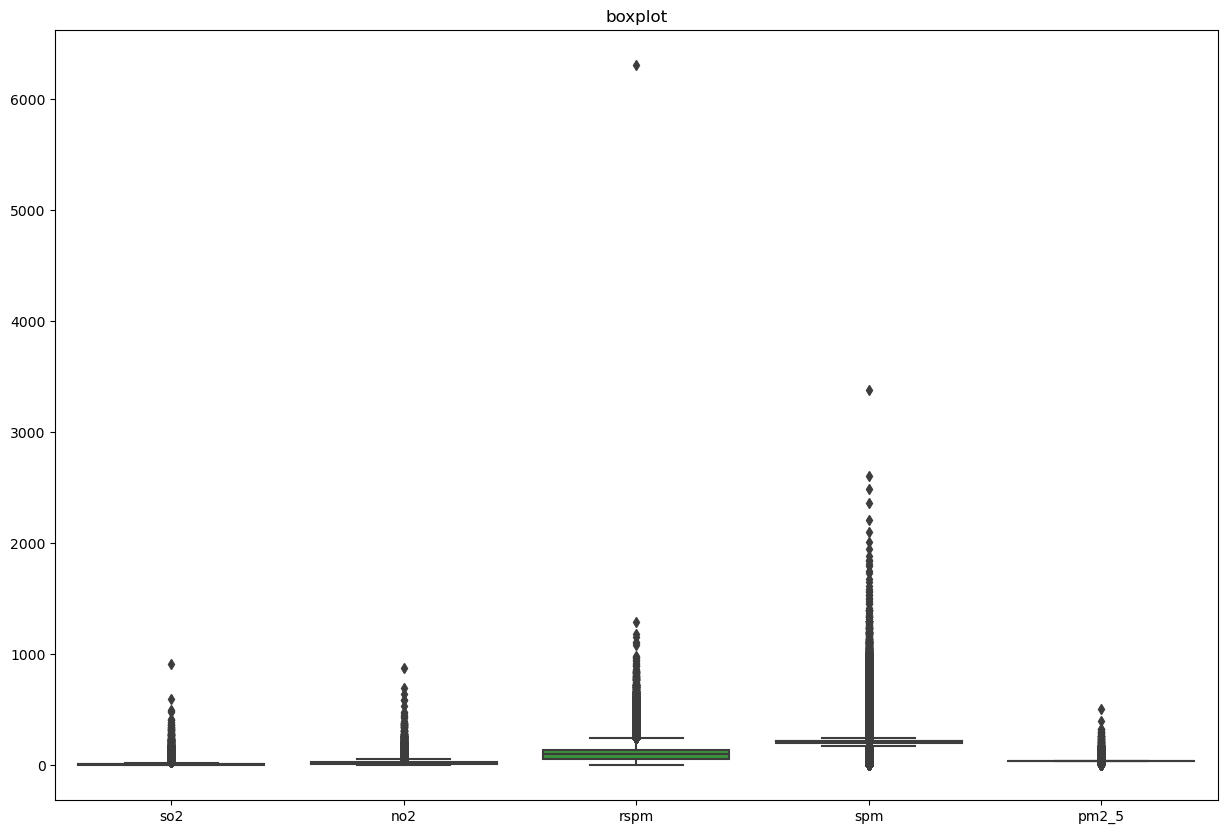

In [34]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.8,ax=ax,fliersize=5)
ax.set_title("boxplot")

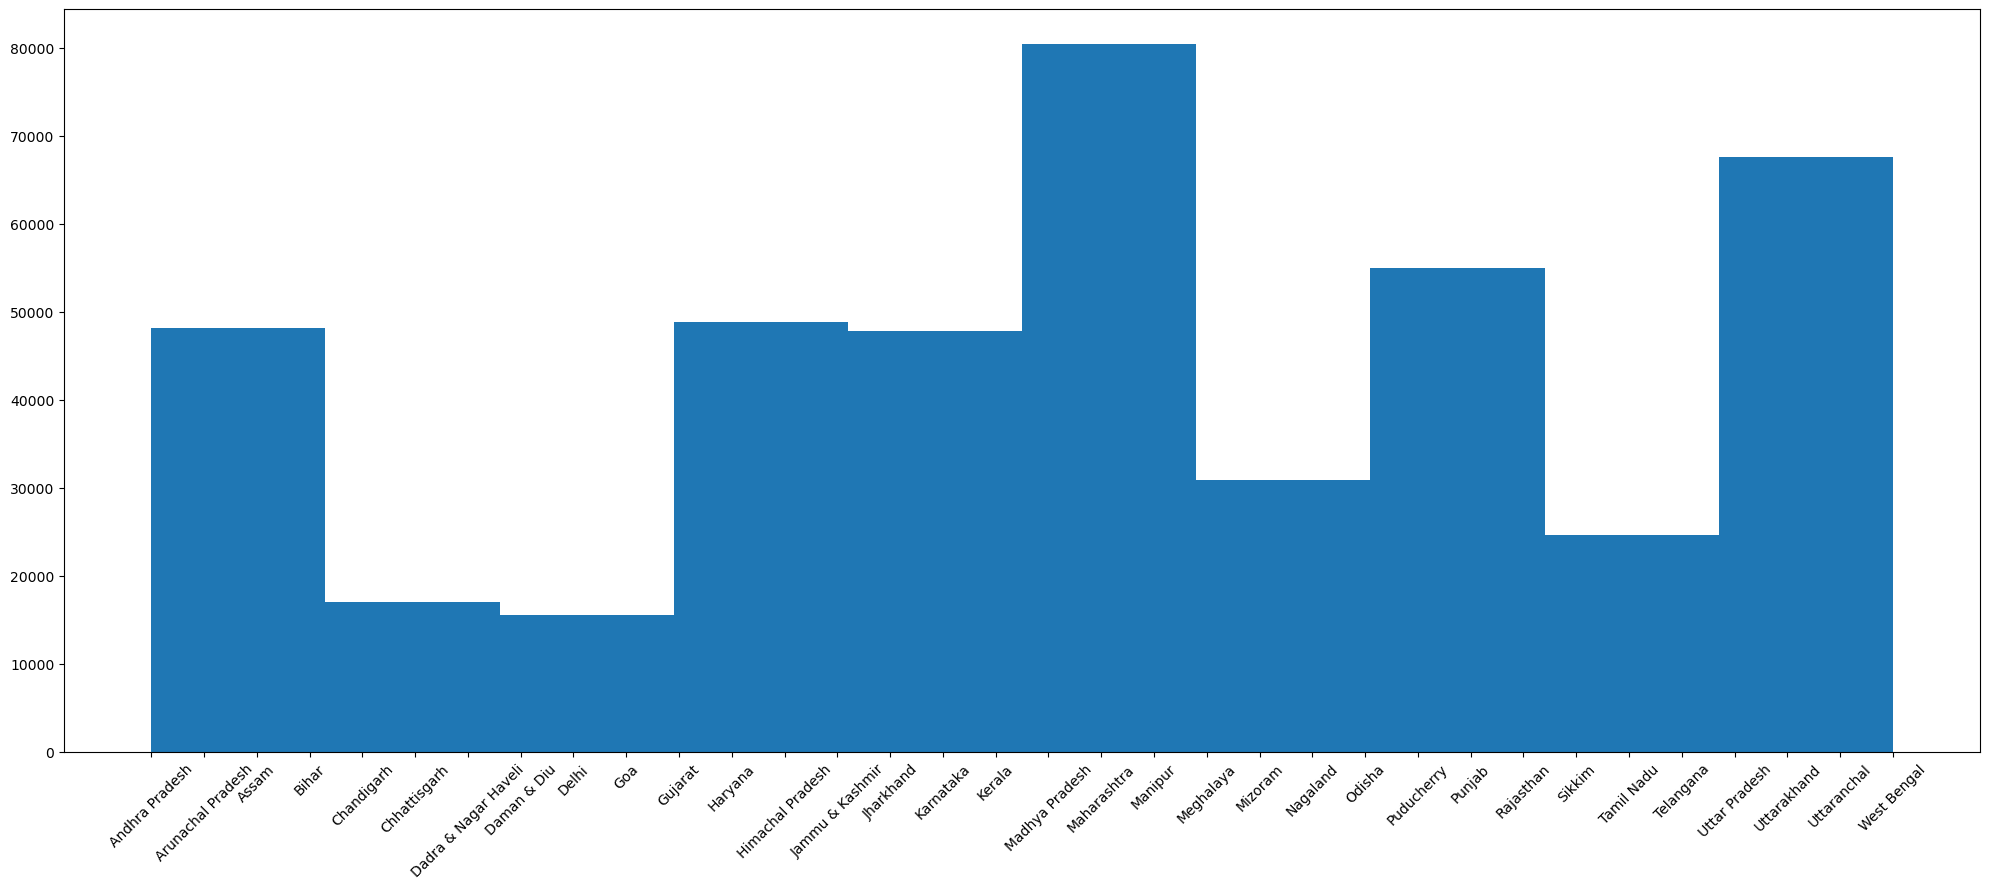

In [35]:
plt.figure(figsize=(20,9))
ax=plt.hist(x='state',data=df, align='mid')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Barplot')

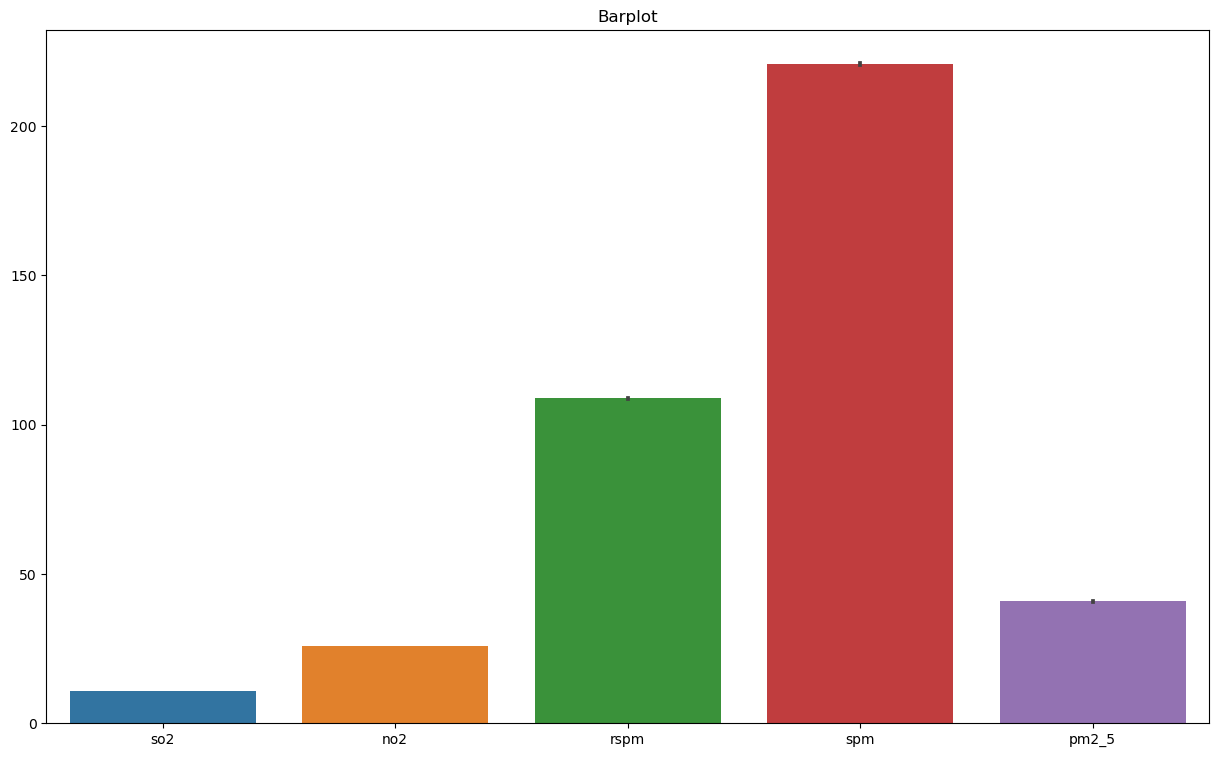

In [36]:
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df)
ax.set_title("Barplot")

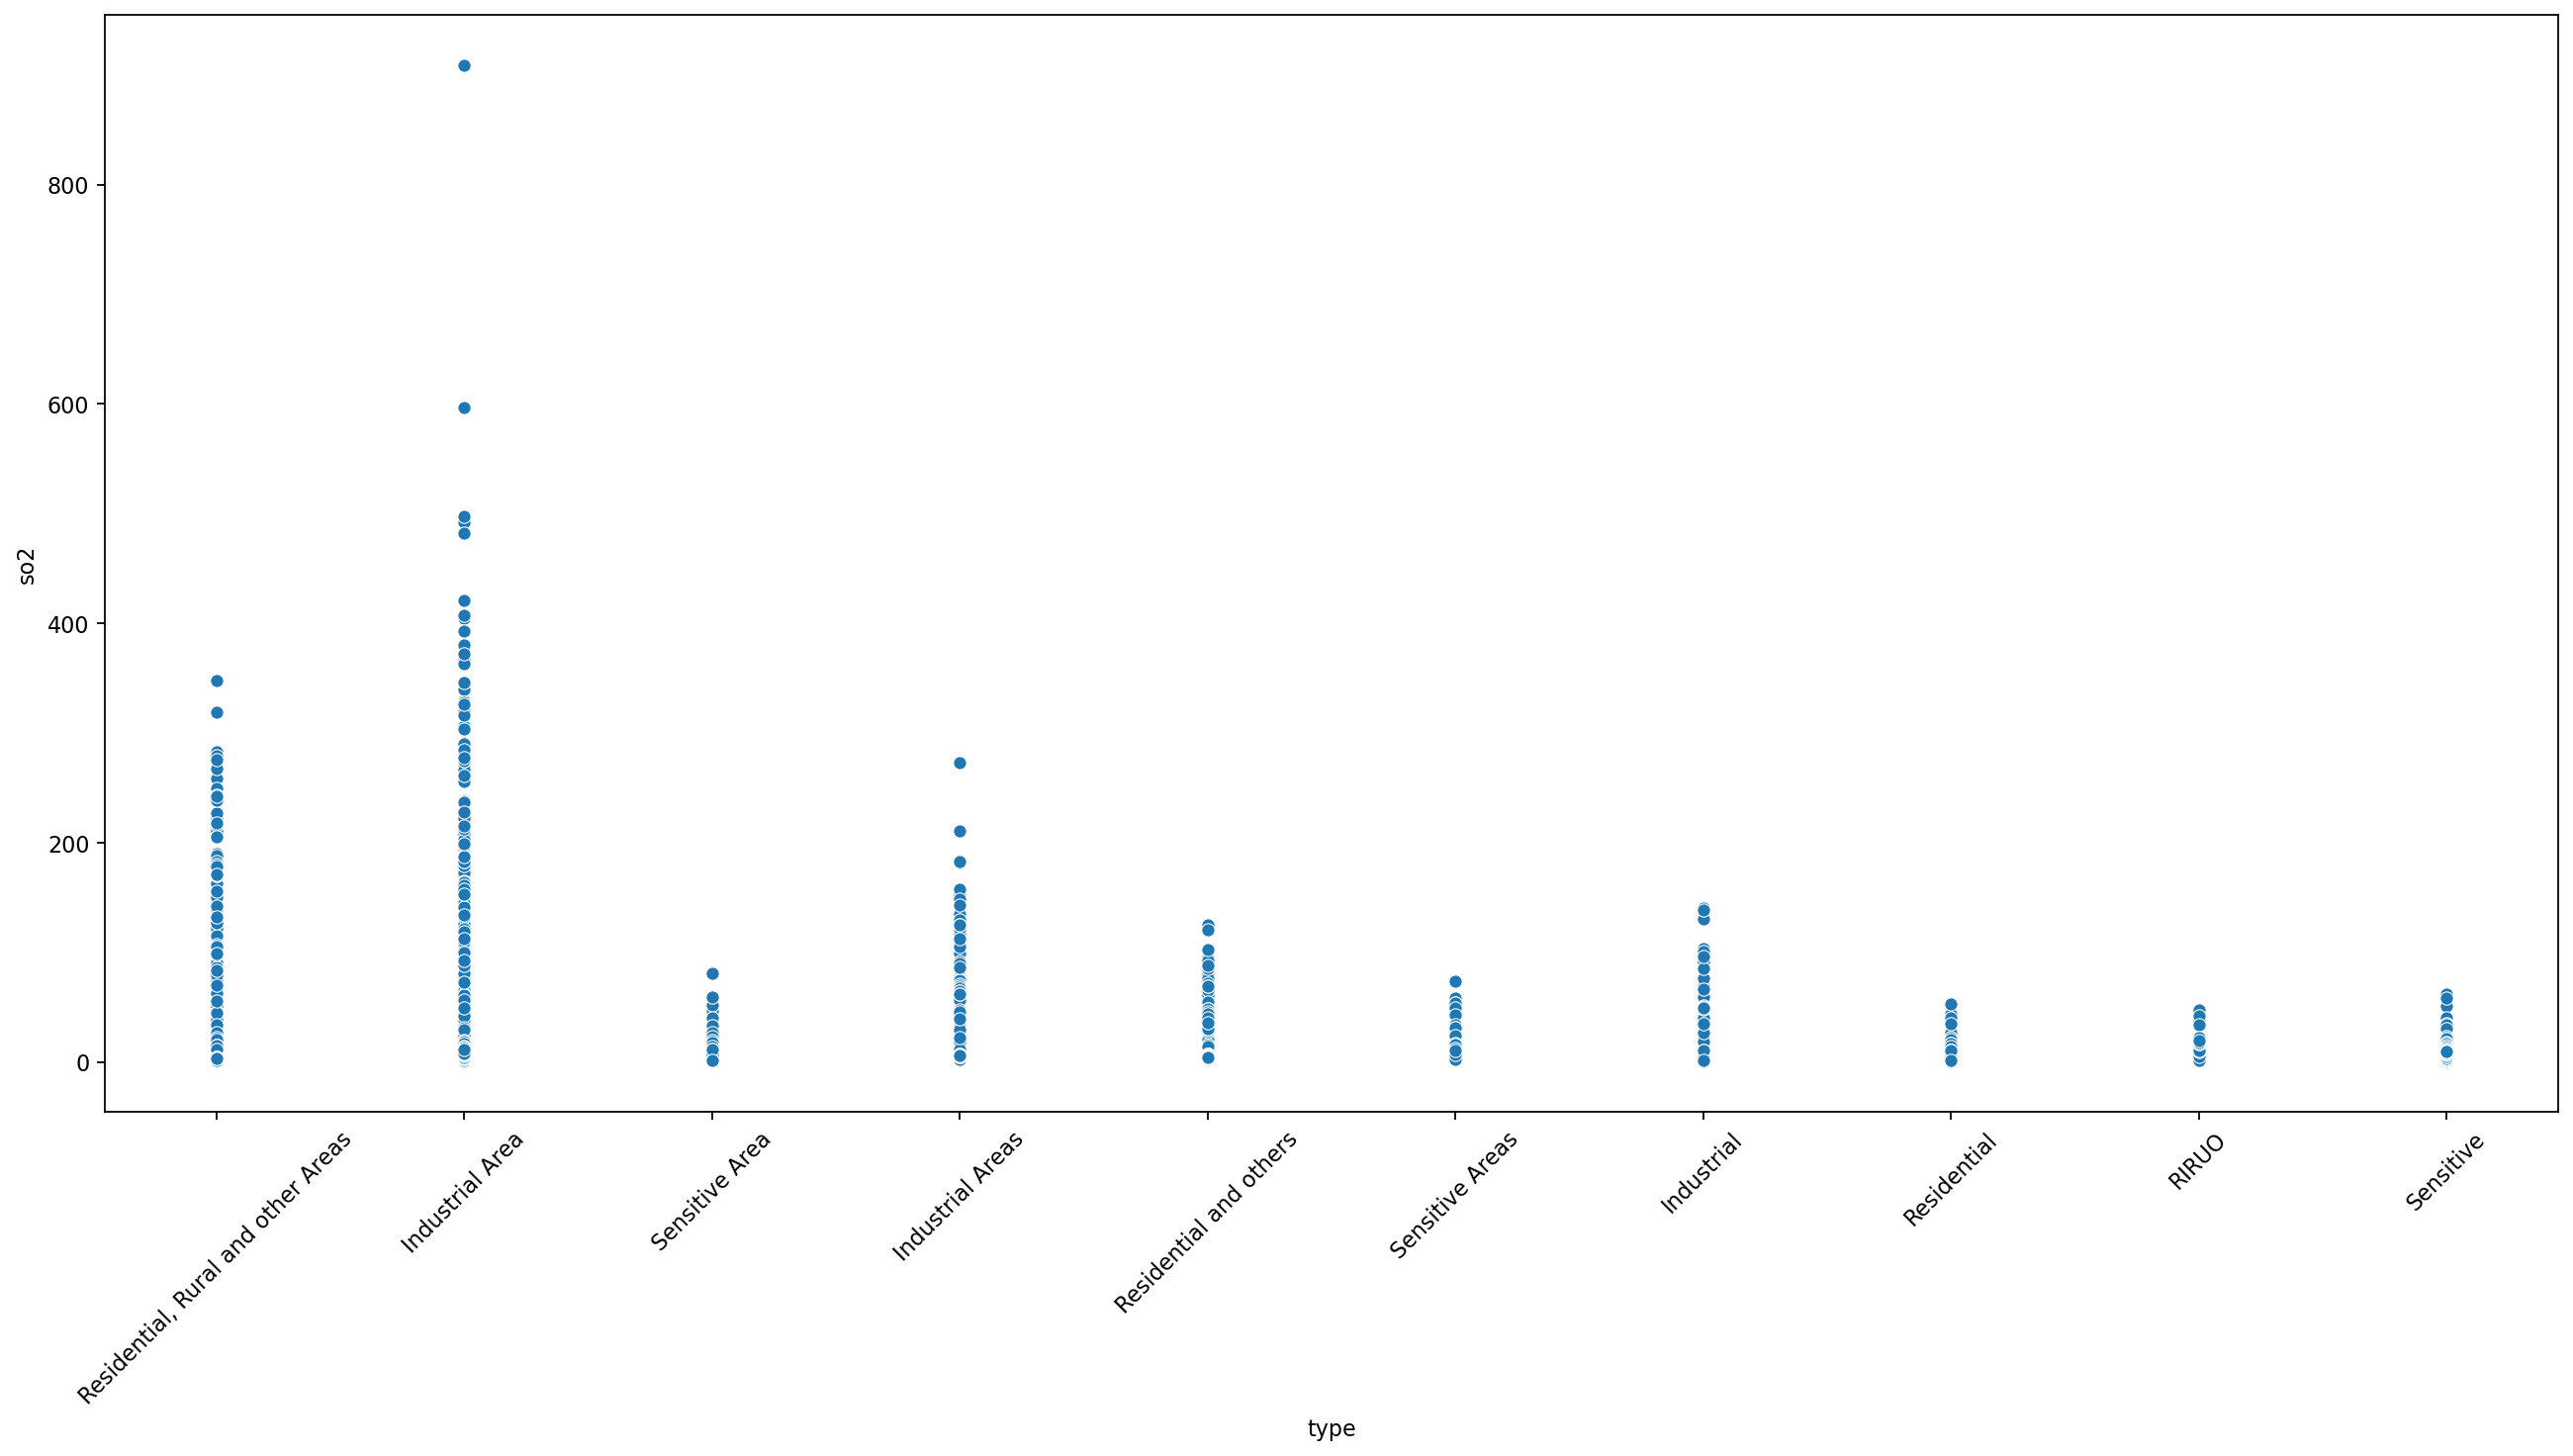

In [38]:
plt.figure(figsize=(20,9))
ax=sns.scatterplot(x='type', y='so2', data=df, visible=True)
plt.xticks(rotation=45)
ax.figure.set_dpi(160)
plt.show()

In [40]:
df1=pd.read_csv('heart.csv')

In [41]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [42]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

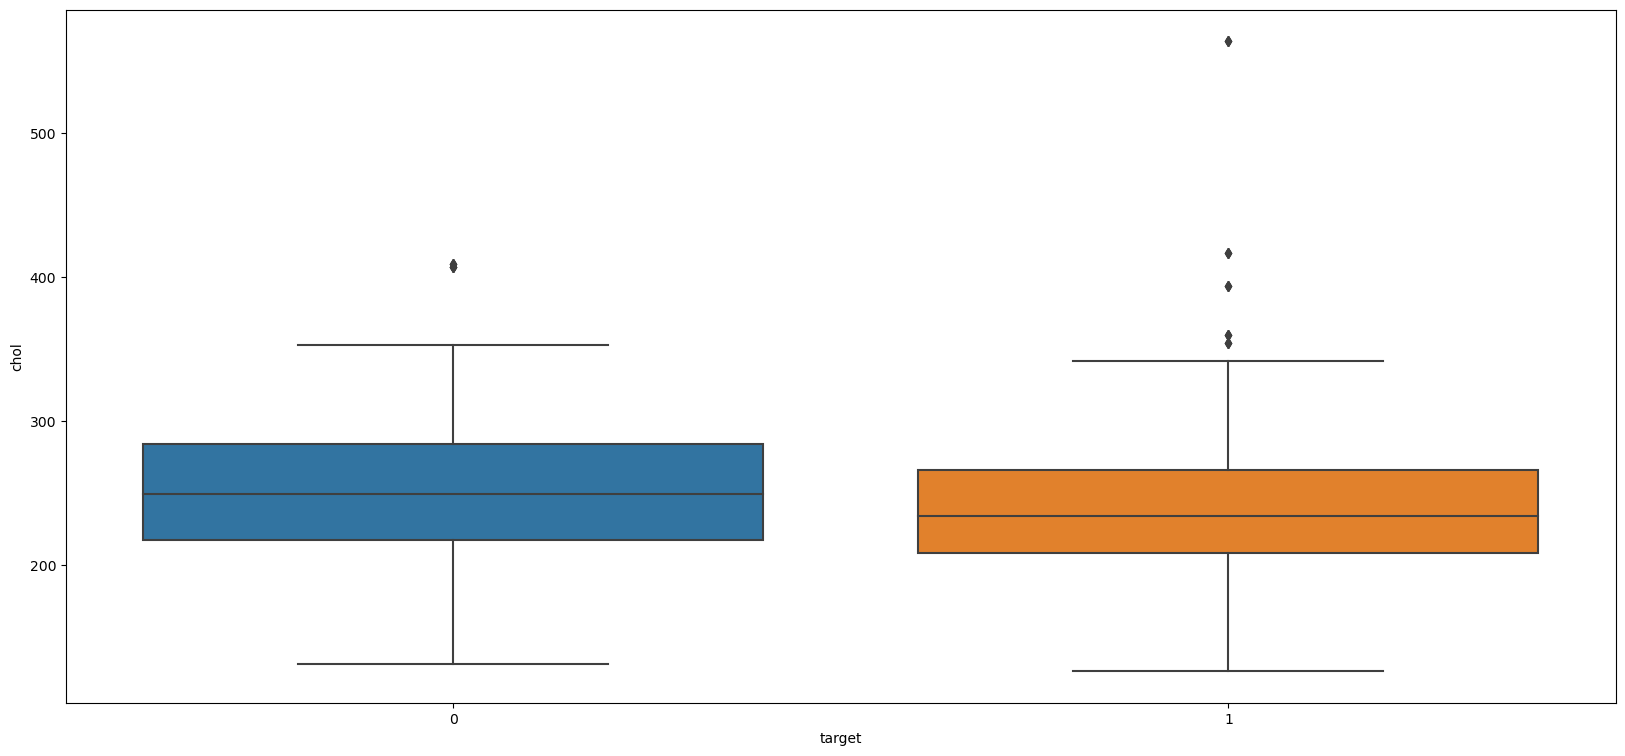

In [43]:
plt.figure(figsize=(20,9))
bxplt=sns.boxplot(x='target', y='chol', data=df1)
plt.show()

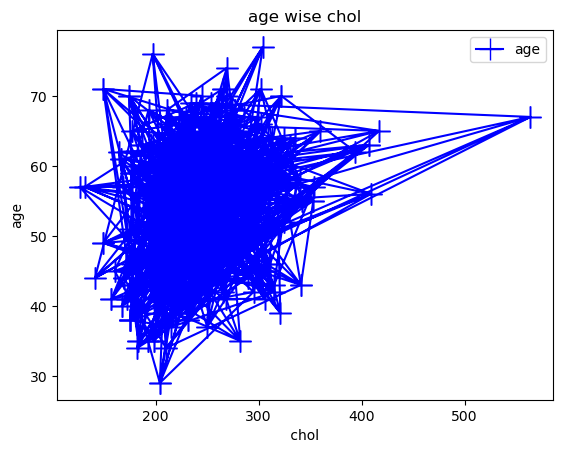

In [44]:
df1.plot(x='chol',y='age',marker='+',color='blue',markersize=16)
plt.xlabel(" chol ")
plt.ylabel("age")
plt.title("age wise chol")
plt.show()

<Axes: >

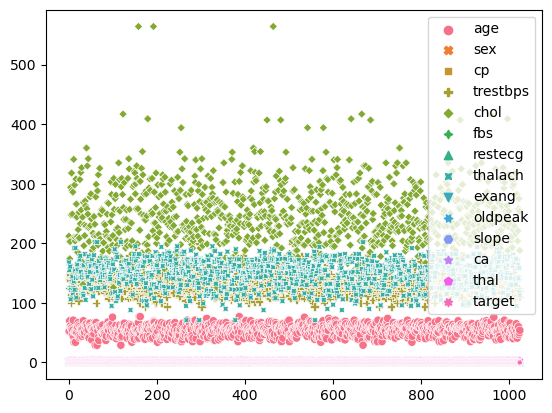

In [45]:
sns.scatterplot(data=df1)

<Axes: xlabel='age', ylabel='thalach'>

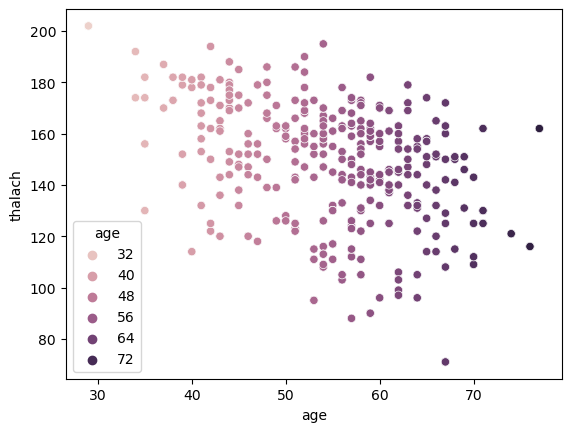

In [46]:
sns.scatterplot(x='age',y='thalach',data=df1,hue='age')

<Axes: xlabel='age', ylabel='thalach'>

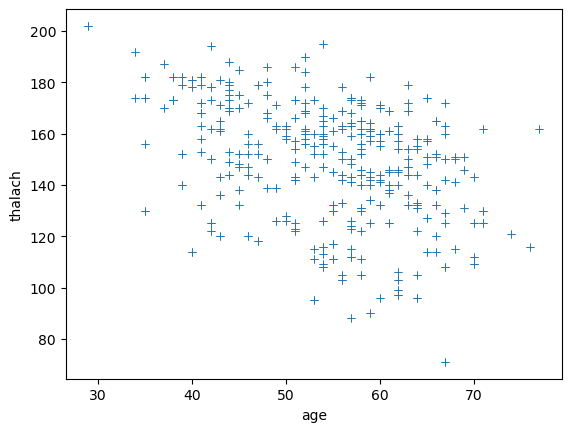

In [47]:
sns.scatterplot(x='age',y='thalach',data=df1,marker='+')

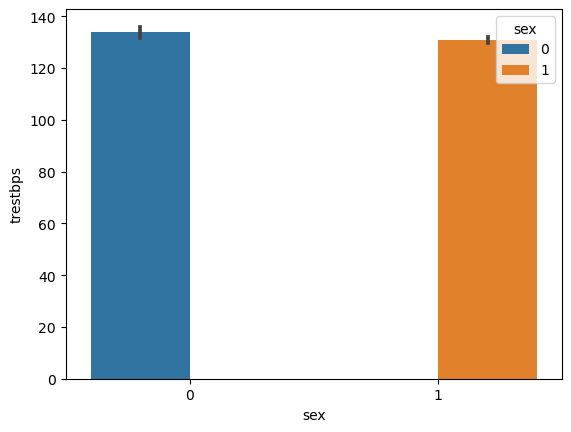

In [48]:
barplot=sns.barplot(x='sex',y='trestbps',data=df1,hue='sex')
plt.show()

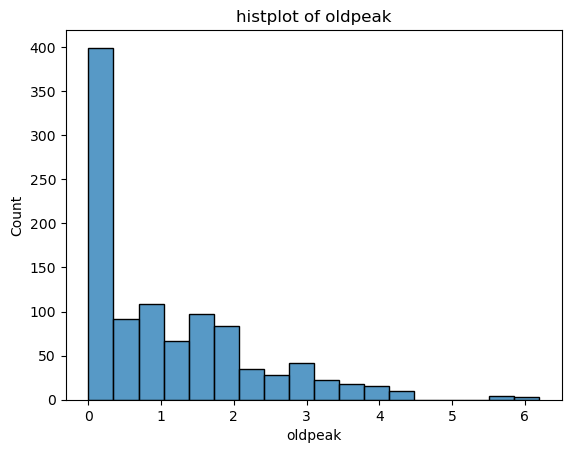

In [49]:
ax=sns.histplot(x='oldpeak',data=df1)
ax.set_title("histplot of oldpeak")
plt.show()

In [50]:
db = pd.read_csv('forestfires.csv')

In [51]:
db.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [52]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


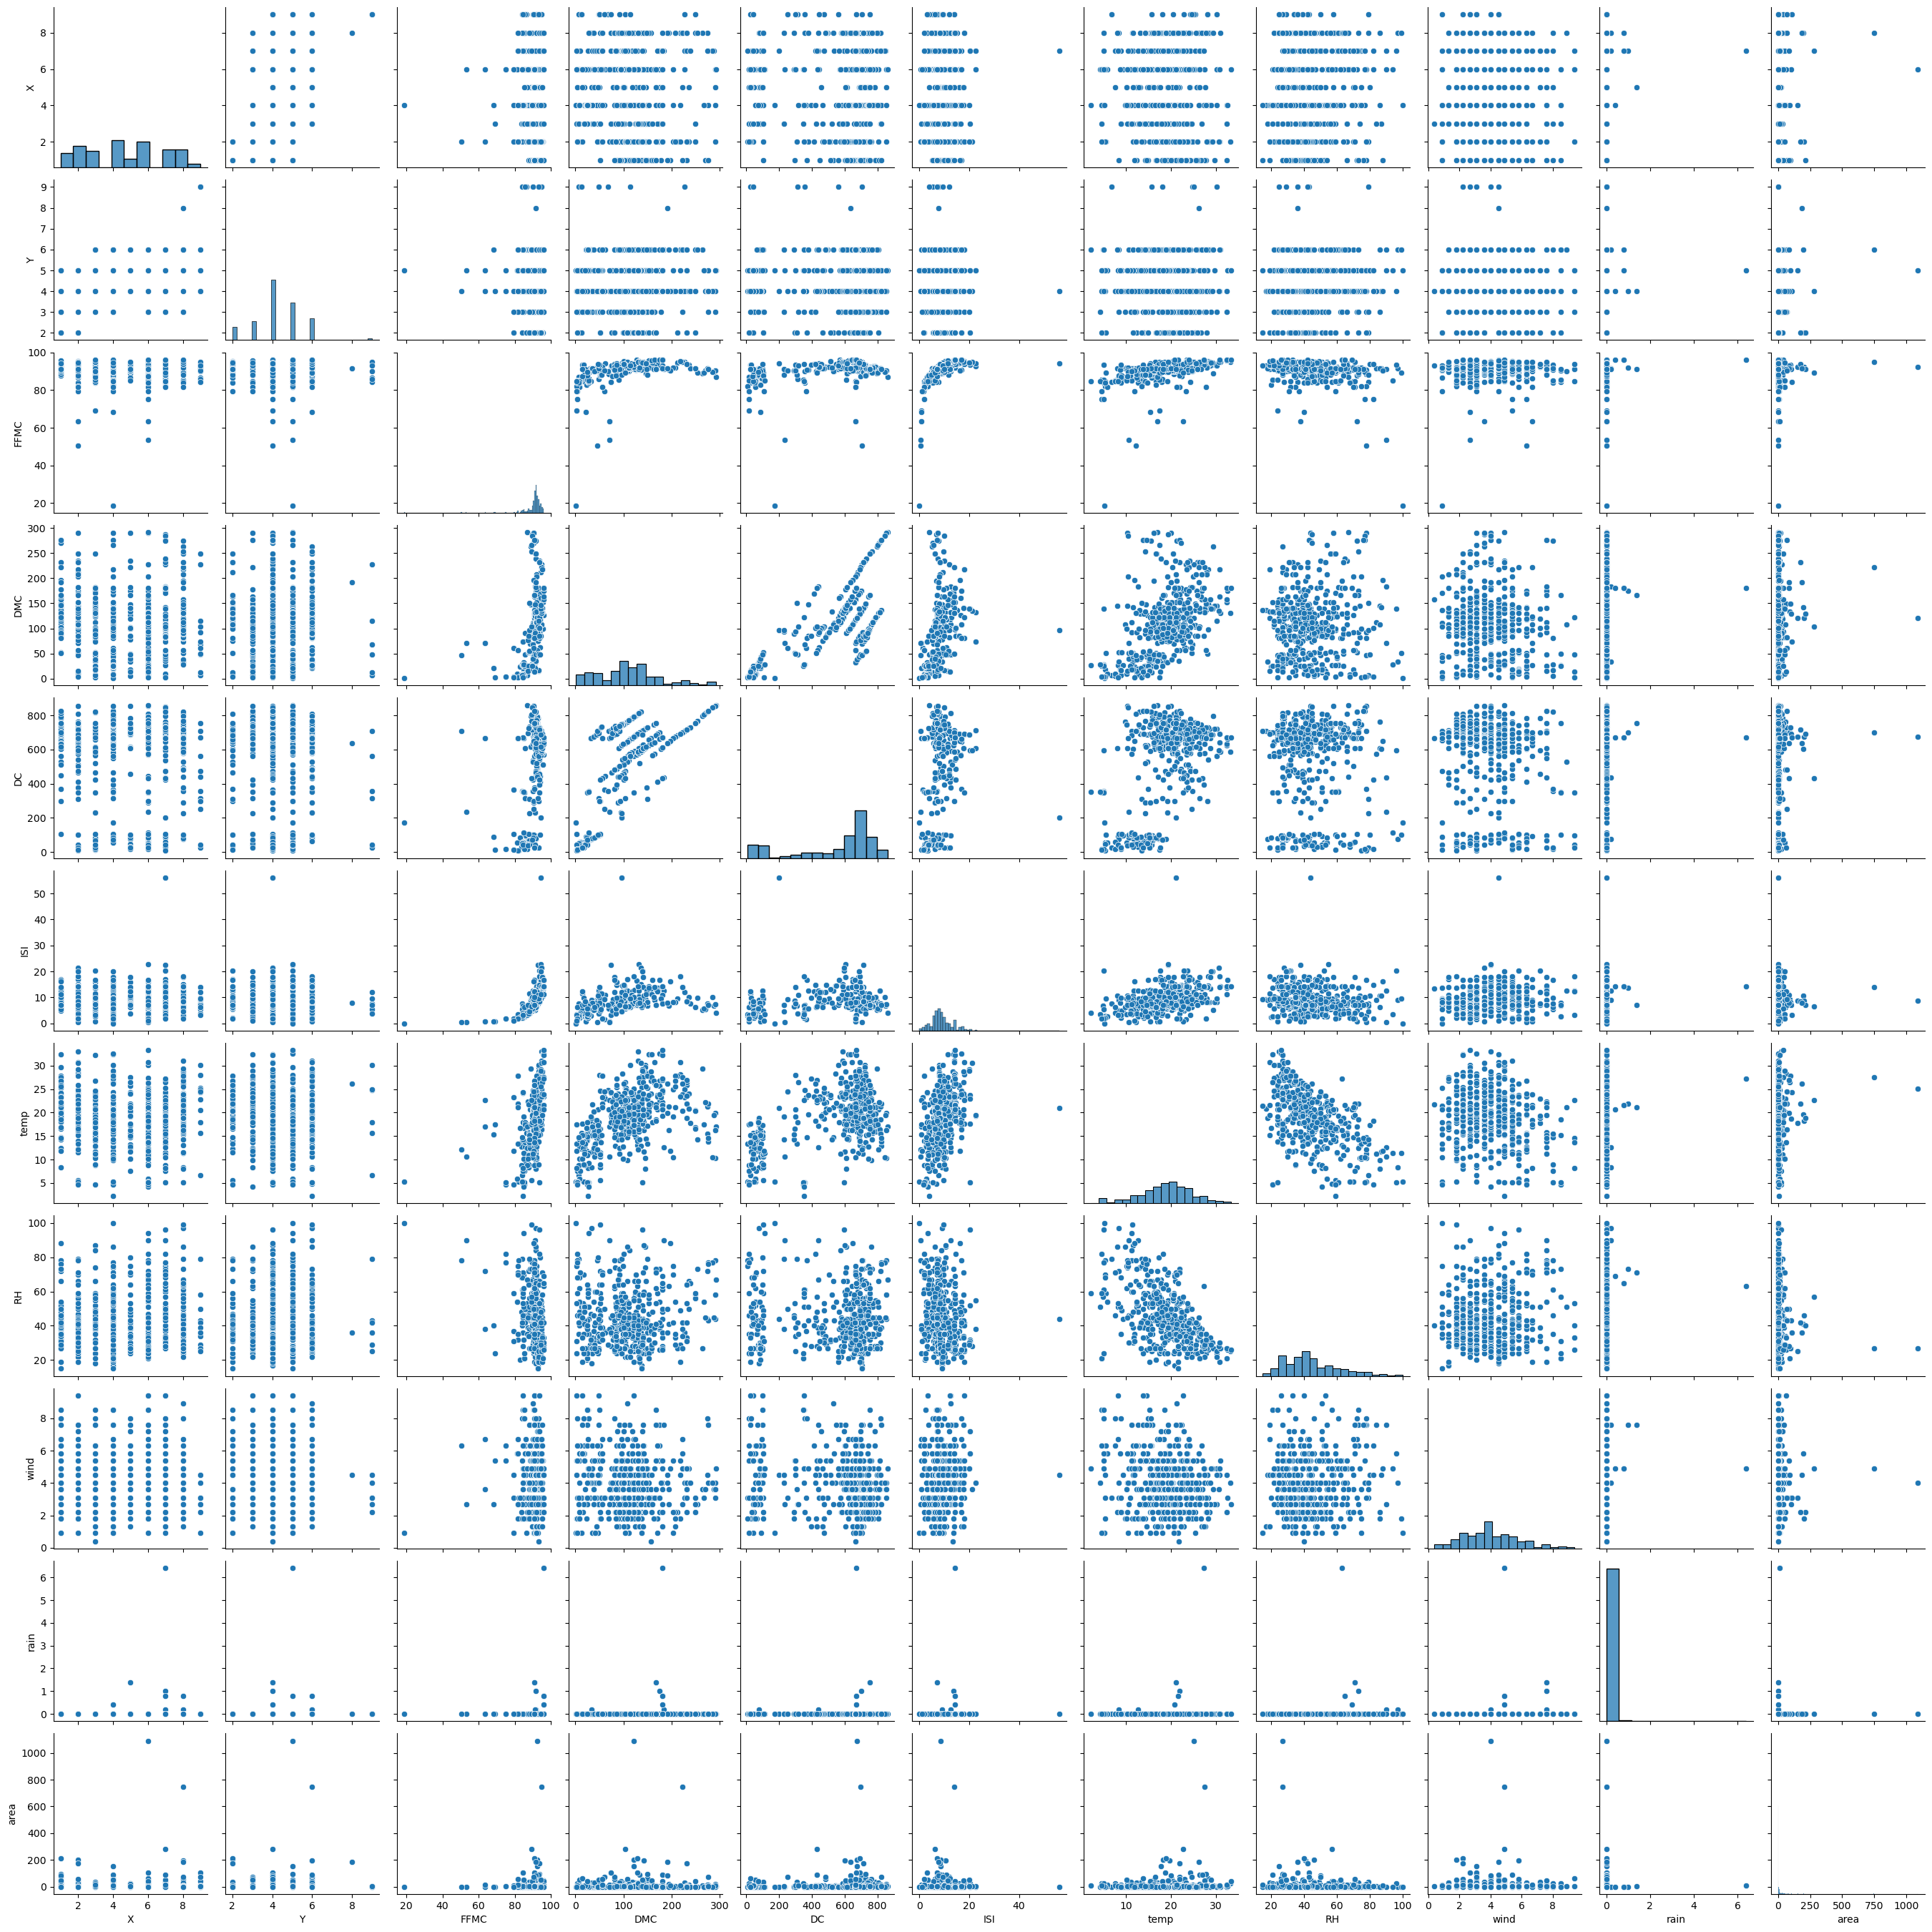

In [53]:
sns.pairplot(db)

/var/folders/dh/8yr95nx513bf7h0cpwgm30jw0000gn/T/ipykernel_69251/2386166638.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

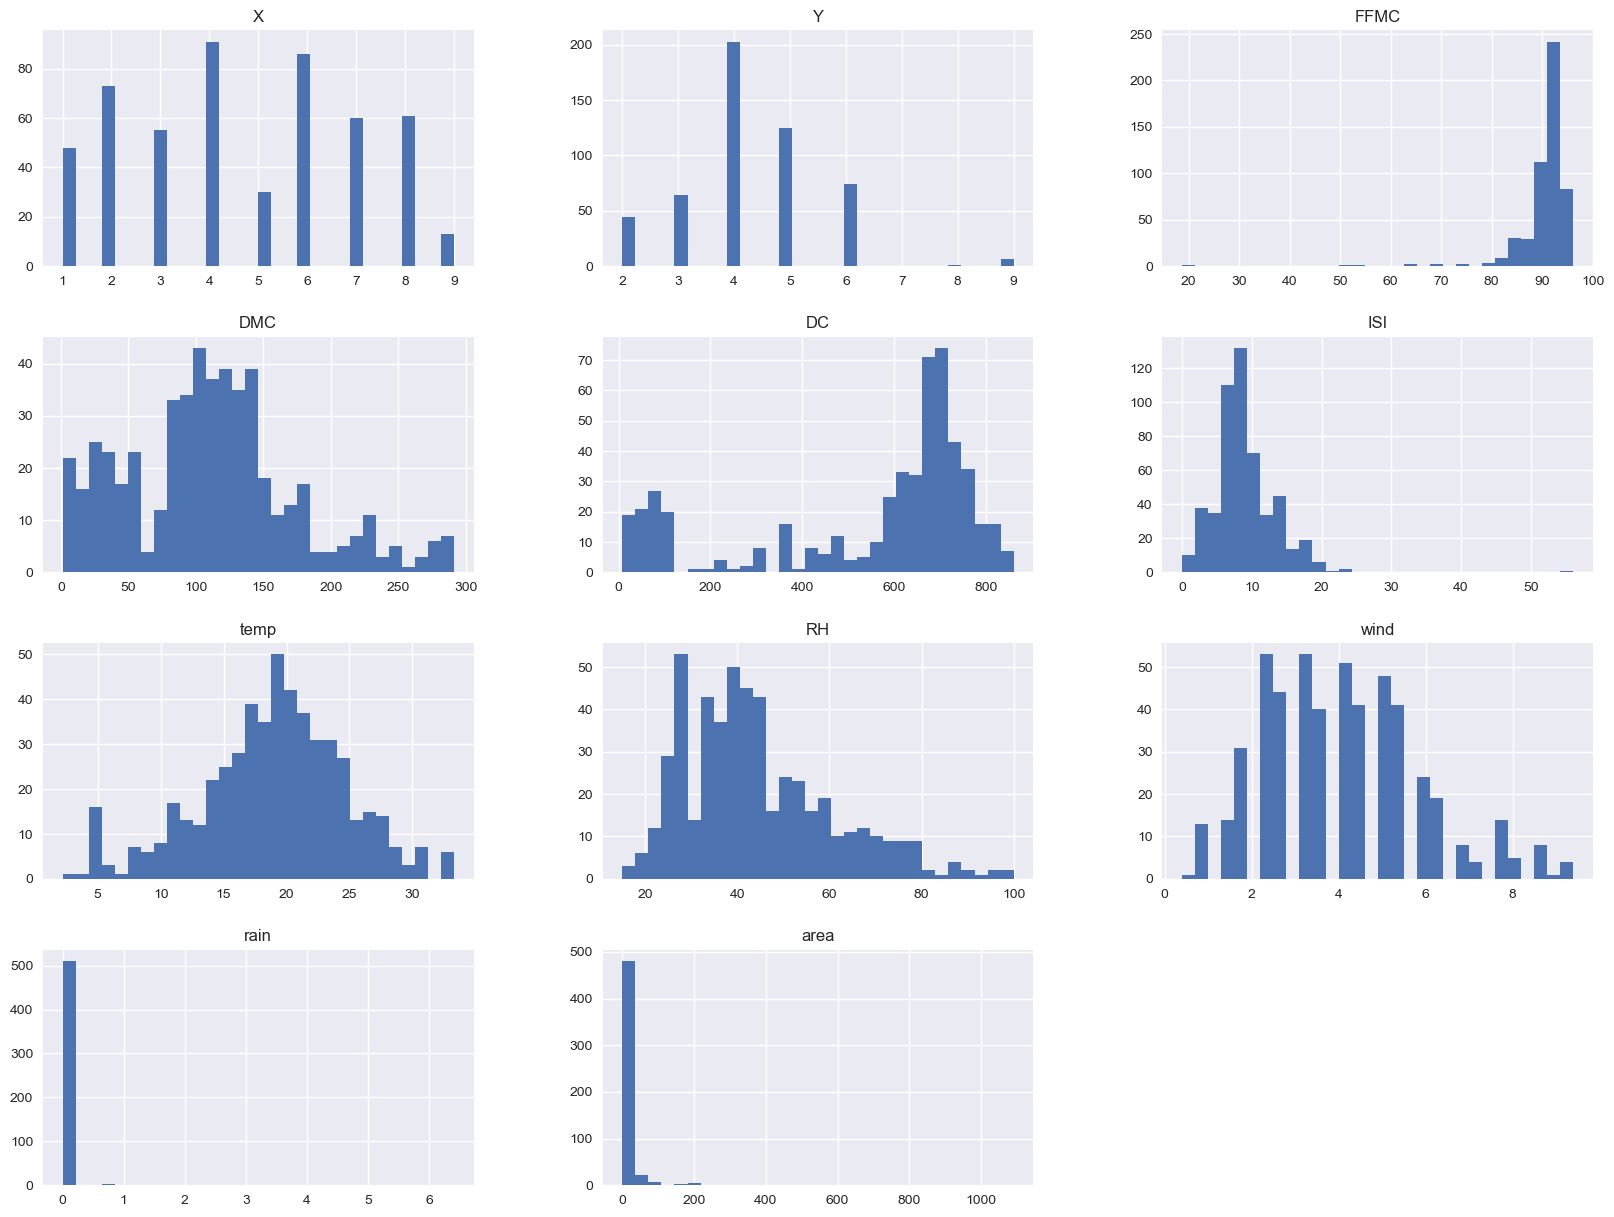

In [54]:
plt.style.use('seaborn')
db.hist(bins=30, figsize=(20,15))

In [55]:
db.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
db.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [56]:
db.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


<Figure size 1500x700 with 0 Axes>

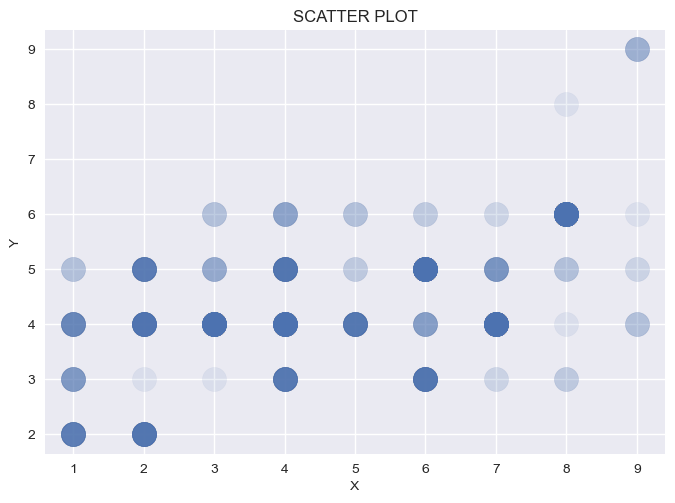

In [57]:
plt.figure(figsize=(15,7))
db.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset
plt.title("SCATTER PLOT")
plt.show()

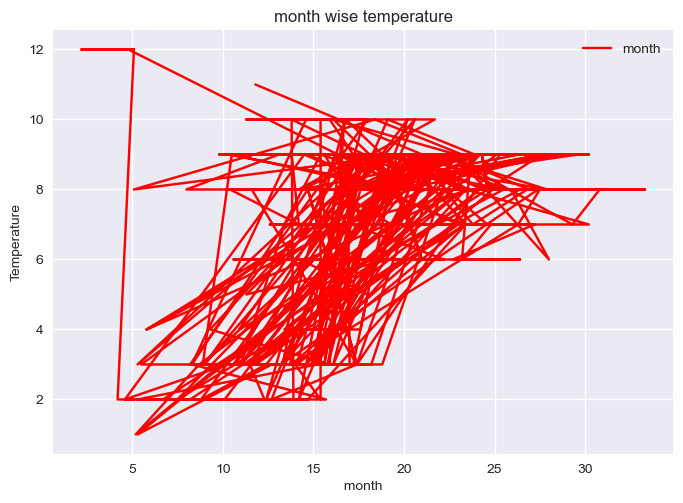

In [58]:
db.plot(x='temp',y='month',marker='+',color='red',markersize=16)
plt.xlabel(" month ")
plt.ylabel("Temperature")
plt.title("month wise temperature")
plt.show()

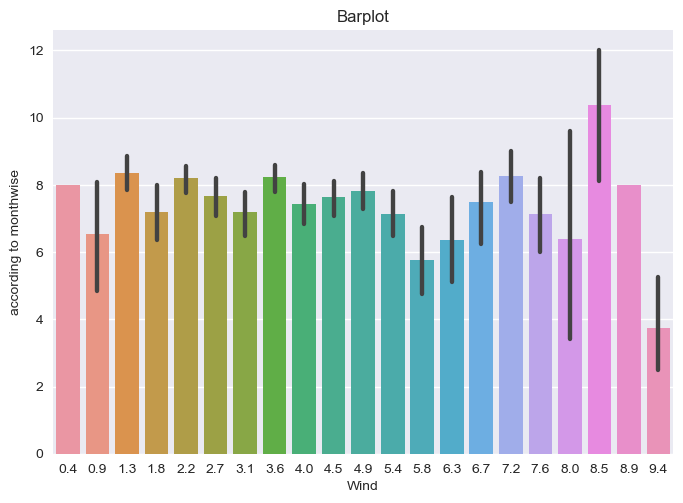

In [59]:
fig=plt.figure()
barplot=sns.barplot(x='wind',y='month',data=db)
plt.xlabel("Wind")
plt.ylabel("according to monthwise")
plt.title("Barplot")
plt.show()
fig.savefig("barplot_forest.png")

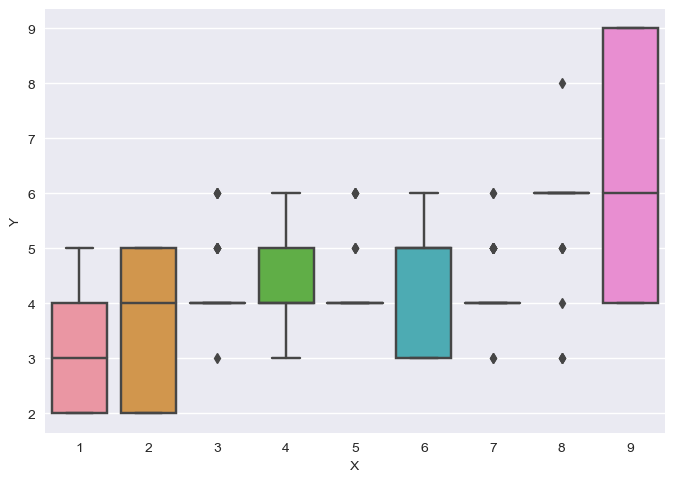

In [60]:
fig = plt.figure()
bxplt=sns.boxplot(x='X',y='Y',data=db)
plt.show()
fig.savefig("box_forest.png")